## 基本背景知识

线性回归
$$ z = w_0x_0+w_1x_1+...+w_nx_n $$
Sigmoid函数进行逻辑回归
$$ \sigma(z) = \frac{1}{1+e^{-z}} $$

梯度上升（求最大值）
$$ \boldsymbol{w} = \boldsymbol{w}+\alpha\nabla_{\boldsymbol{w}}f(\boldsymbol{w}) $$

In [44]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## 共用函数

In [45]:
def load_data_set():
    data_mat = []; label_mat = []
    fr = open('data/logistic/test_set.txt')
    for line in fr.readlines():
        line_attr = line.strip().split()
        data_mat.append([1.0, float(line_attr[0]), float(line_attr[1])])
        label_mat.append(int(line_attr[2]))
    return data_mat, label_mat


def sigmoid(in_x):
    return 1.0/(1+np.exp(-in_x))


def plot_best_fit(weights):
    data_mat, label_mat = load_data_set()
    data_attr = np.array(data_mat)
    n = np.shape(data_attr)[0]  # 样本数量

    # 绘制样本点
    xcord1 = []; ycord1 = []
    xcord2 = []; ycord2 = []
    for i in range(n):
        if int(label_mat[i]) == 1:
            xcord1.append(data_attr[i, 1]); ycord1.append(data_attr[i, 2])
        else:
            xcord2.append(data_attr[i, 1]); ycord2.append(data_attr[i, 2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')

    # 绘制回归线
    x = np.arange(-3.0, 3.0, 0.1)
    y = (-weights[0] - weights[1] * x) / weights[2]
    ax.plot(x, y)

    plt.xlabel('X1'); plt.ylabel('X2')
    plt.show()

## 训练：梯度上升

[[ 12.78439366]
 [  1.11820765]
 [ -1.74082688]]


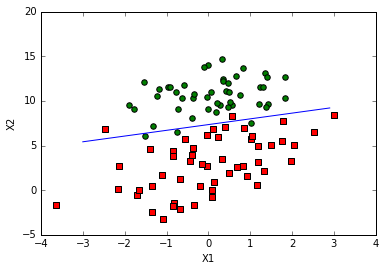

In [46]:
def grad_ascent(data_mat_in, class_labels):
    """
    梯度上升算法

    Parameters
        data_mat_in 2维数组，每列表示不同的特征，每行表示一个训练样本
        class_labels 列别标签 列数为1，行数为样本的个数
    Return
        回归的参数
    """
    data_matrix = np.mat(data_mat_in)  # numpy矩阵
    label_mat = np.mat(class_labels).transpose() # 矩阵转置
    m,n = np.shape(data_matrix)
    alpha = 0.01  # 步长
    max_cycles = 500  # 迭代次数
    weights = np.ones((n, 1))  # 回归系数
    for k in range(max_cycles):
        h = sigmoid(data_matrix * weights)  # 矩阵乘法，h是一个列向量，每一行是对每个样本类别的预测
        error = (label_mat - h)

        # 计算真实列别与预测类别的差值，按照差值的方向调整回归系数
        weights = weights + alpha * data_matrix.transpose() * error
    return weights
    
data_arr, label_mat = load_data_set()
weights = grad_ascent(data_arr, label_mat)
print(weights)
plot_best_fit(weights.getA())

## 训练：随机梯度上升

[ 1.01702007  0.85914348 -0.36579921]


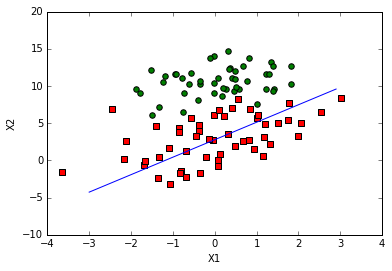

In [47]:
def stoc_grad_ascent(data_mat_in, class_labels):
    """
    随机梯度上升算法
    每次计算不是计算所有样本点的误差，只计算一个样本点

    Parameters
        data_mat_in 2维数组，每列表示不同的特征，每行表示一个训练样本
        class_labels 列别标签 列数为1，行数为样本的个数
    Return
        回归的参数
    """
    data_matrix = np.array(data_mat_in)  # numpay array
    m,n = np.shape(data_matrix)
    alpha = 0.01
    weights = np.ones(n)
    for i in range(m):
        h = sigmoid(sum(data_matrix[i] * weights))
        error = class_labels[i] - h
        weights += alpha * error * data_matrix[i]
    return weights

data_arr, label_mat = load_data_set()
weights = stoc_grad_ascent(data_arr, label_mat)
print(weights)
plot_best_fit(weights)

## 训练：改进的随机梯度上升

[ 9.98251734  0.77726401 -1.51535565]


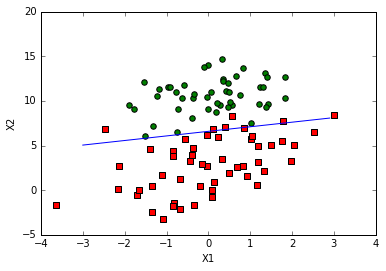

In [61]:
def stoc_grad_ascent1(data_mat_in, class_labels, num_iter=150):
    """
    改进的随机梯度上升算法
    每次计算不是计算所有样本点的误差，只计算一个样本点

    Parameters
        data_mat_in 2维数组，每列表示不同的特征，每行表示一个训练样本
        class_labels 列别标签 列数为1，行数为样本的个数
        num_iter 迭代次数
    Return
        回归的参数
    """
    data_matrix = np.array(data_mat_in)  # numpay array
    m,n = np.shape(data_matrix)
    weights = np.ones(n)

    for j in range(num_iter):
        data_index = list(range(m))
        for i in range(m):
            alpha = 2/(1.0+j+i)+0.01  # 逐步减小alpha，当遍历次数越来越大时，alpha过大会引起振荡

            rand_index = int(np.random.uniform(0, len(data_index)))

            h = sigmoid(sum(data_matrix[rand_index] * weights))
            error = class_labels[rand_index] - h
            weights += alpha * error * data_matrix[rand_index]
            del(data_index[rand_index])
    return weights

data_arr, label_mat = load_data_set()
weights = stoc_grad_ascent1(data_arr, label_mat, 100)
print(weights)
plot_best_fit(weights)

## 应用：从疝气病症预测病马的死亡率

In [62]:
def classify_vector(in_x, weights):
    """
    预测类别
    :param in_x:
    :param weights:
    :return:
    """
    prob = sigmoid(sum(in_x * weights))
    if prob > 0.5:
        return 1.0
    else:
        return 0.0


def colic_test():
    fr_train = open('data/logistic/horseColicTraining.txt')
    fr_test = open('data/logistic/horseColicTest.txt')

    # 训练数据
    training_set = []; training_labels = []
    for line in fr_train.readlines():
        curr_line = line.strip().split('\t')
        line_attr = []
        for i in range(21):
            line_attr.append(float(curr_line[i]))
        training_set.append(line_attr)
        training_labels.append(float(curr_line[21]))

    # 训练
    training_weights = stoc_grad_ascent1(training_set, training_labels, 800)

    # 测试数据
    error_count = 0; num_test_vec = 0.0
    for line in fr_test.readlines():
        num_test_vec += 1.0
        curr_line = line.strip().split('\t')
        line_attr = []
        for i in range(21):
            line_attr.append(float(curr_line[i]))
        # 测试误差统计
        if int(classify_vector(np.array(line_attr), training_weights)) != int(curr_line[21]):
            error_count += 1
    error_rate = float(error_count) / num_test_vec
    print("the error rate of this test is: %f" % error_rate)
    return error_rate


def multi_test():
    """
    多次测试
    :return:
    """
    num_tests = 10; error_sum = 0.0
    for k in range(num_tests):
        error_sum += colic_test()
    print("after %d iterations the average error rate is: %f" % (num_tests, error_sum / float(num_tests)))

    
multi_test()

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: RuntimeWarning: overflow encountered in exp


the error rate of this test is: 0.283582
the error rate of this test is: 0.358209
the error rate of this test is: 0.253731
the error rate of this test is: 0.313433
the error rate of this test is: 0.447761
the error rate of this test is: 0.253731
the error rate of this test is: 0.328358
the error rate of this test is: 0.388060
the error rate of this test is: 0.373134
the error rate of this test is: 0.388060
after 10 iterations the average error rate is: 0.338806
